In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv(r'D:\Data Analyst stuffs\Python stuffs\Learn Python for Data Analysis\PYTHON_EXERCISES_UDEMY\Bitcoin Case Study\bitcoin_price_Training - Training.csv')

# Convert the datetime from str to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as index
df = df.set_index('Date').sort_index()

In [6]:
# Resample the data to quarterly frequency and calculate the mean closing price
quarterly_resample = df['Close'].resample('QE').mean().to_frame()

# Extract only the data for July 2017 to use in the candlestick chart
df_july = df.loc[(df.index.year == 2017) & (df.index.month == 7)].copy()

# Create a line chart showing quarterly average closing prices
fig_line = px.line(
    data_frame=quarterly_resample,
    x=quarterly_resample.index,
    y='Close'
)

# Create a candlestick chart for daily price movements in July 2017
fig_candlestick = go.Candlestick(
        x=df_july.index,
        open=df_july['Open'],
        high=df_july['High'],
        low=df_july['Low'],
        close=df_july['Close']
)

# Create a subplot layout with 2 rows and 1 column:
# - Row 1: quarterly trend line
# - Row 2: detailed July candlestick chart
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=False,
    subplot_titles=('Quarterly Average Closing Price (2013–2017)', 'Daily Price Movements – July 2017')
)

# Add the line chart traces into the first subplot
for trace in fig_line.data:
    fig.add_trace(trace, row=1, col=1)

# Highlight the period Apr–Jul 2017 with a red shaded rectangle
fig.add_shape(
    type="rect",
    x0="2017-03-31", x1="2017-07-31",
    y0=0,
    y1=quarterly_resample['Close'].max(),
    xref="x1", yref="y1",    # use x and y axis of line chart (row=1, col=1)
    fillcolor="red",
    opacity=0.2,
    layer="below",
    line_width=0
)

# Add the candlestick chart to the second subplot
fig.add_trace(fig_candlestick, row=2, col=1)

# Adjust height, remove legend, disable candlestick range slider
fig.update_layout(
    height=800,
    showlegend=False,
    title='Price Trends Overview: 2013–2017 with Detailed July 2017 Candlestick',
    xaxis2_rangeslider_visible=False, # Remove the slider of candlestick plot
    template='plotly_white'
)

fig.show()

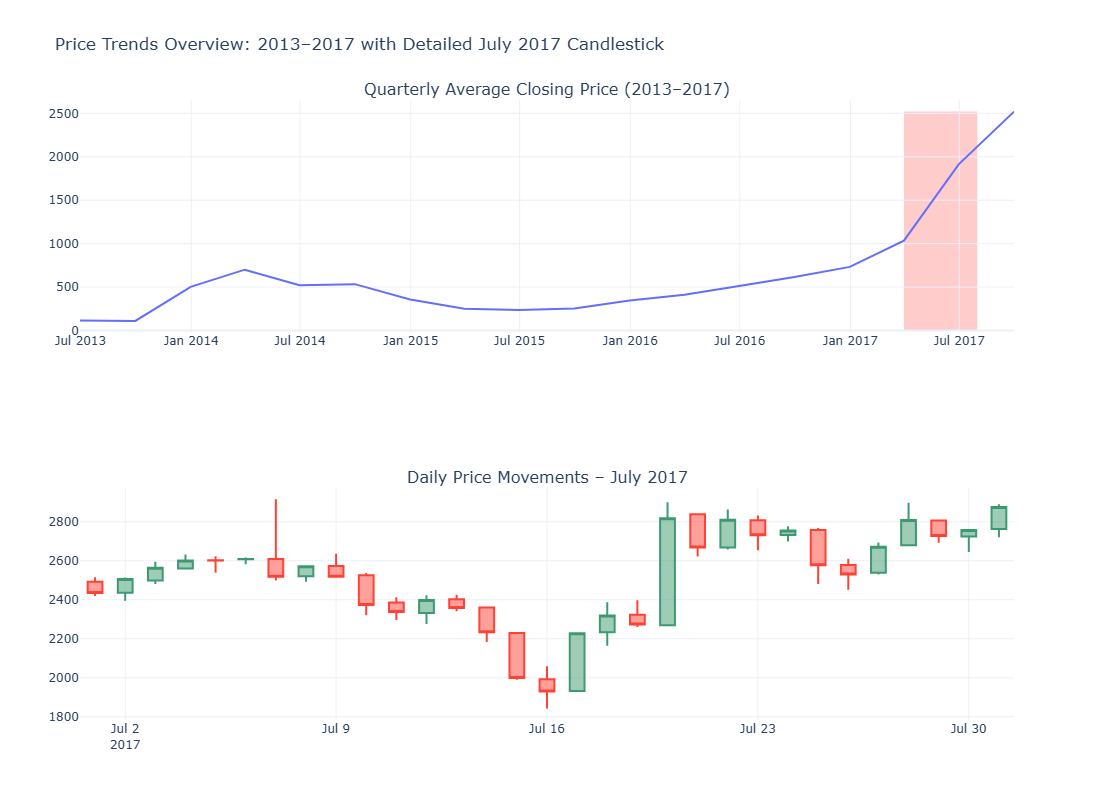

In [ ]:
# Display the saved plot as a static image as Plotly interactive charts cannot be rendered directly on GitHub

from IPython.display import Image

Image(
    filename=r'D:\Data Analyst stuffs\Python stuffs\Learn Python for Data Analysis\PYTHON_EXERCISES_UDEMY\Bitcoin Case Study\Own_Exercises\Closing_Price_Movements_Analysis.png'
) 